### The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2021 Semester 2

## Assignment 1

**Student Name:**    JIAXIN FAN

**Student ID:**     1163511

This iPython notebook is a template which you should use for your Assignment 1 submission. This file should be submitted at the **Assignment 1: Code** link on the LMS, along with any images needed to run your code.

In addition to this file, you should submit a writren report explaining your results at the **Assignment 1: Report** link on the LMS. Please see the assignment specification for details on what must be included in the report for each question.

*Adding proper comments to your code is MANDATORY.*

### 1. Mapping between world and image coordinates
Note: Writing code for this question is optional. However, if you do not include code here you *must* show your computation steps in your written report.

Only has report, all computation list in pdf.

### 2. Secret messages with bandpass filters

In [1]:
import os
import numpy as np
import cv2  
from matplotlib import pyplot as plt
from scipy import fftpack

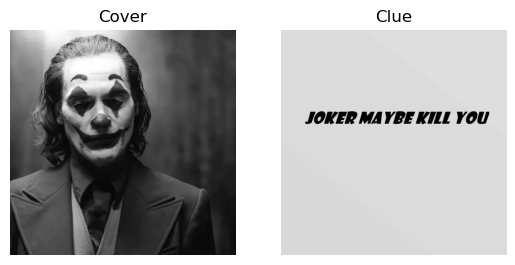

In [2]:
rootpath='./'
cover= cv2.imread(os.path.join(rootpath, "joker.jpg"),cv2.IMREAD_GRAYSCALE) 
clue= cv2.imread(os.path.join(rootpath, "clue.jpg"),cv2.IMREAD_GRAYSCALE) 
    
plt.subplot(1,2,1)
plt.imshow(cover,cmap='gray') 
plt.title('Cover')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(clue,cmap='gray') 
plt.title('Clue')
plt.axis('off')
plt.show()

In [3]:
# Fourier transform
f = np.fft.fft2(cover)
f = np.fft.fftshift(f)
fclue = np.fft.fft2(clue)
fclue = np.fft.fftshift(fclue)

In [4]:
def Gauss_LowPass(f,radius_low):        
    
    m = f.shape[0]
    n = f.shape[1]
    mask = np.zeros((m, n))
  
    x0 = np.floor(m/2)
    y0 = np.floor(n/2)
    for i in range(m):
        for j in range(n):
            dis = np.sqrt((i - x0)**2 + (j - y0)**2)
            mask[i][j] = np.exp((-1)*dis**2/2/(radius_low**2))
    result = np.multiply(f, mask) 
    return result,mask

In [5]:
def Gauss_HighPass(f,radius_high):        
    
    m = f.shape[0]
    n = f.shape[1]
    mask = np.zeros((m, n))
  
    x0 = np.floor(m/2)
    y0 = np.floor(n/2)
    for i in range(m):
        for j in range(n):
            dis = np.sqrt((i - x0)**2 + (j - y0)**2)
            mask[i][j] = 0.2 - np.exp((-1)*dis**2/2/(radius_high**2))
    result = np.multiply(f, mask) 
    return result,mask

In [6]:
f_low_filtered,mask_low = Gauss_LowPass(f,50)
f_high_filtered,mask_high = Gauss_HighPass(fclue,5)
#add them together in Fourier domain and transform to get the filtered image 
img = np.real(np.fft.ifft2(np.fft.fftshift(f_low_filtered+f_high_filtered)))

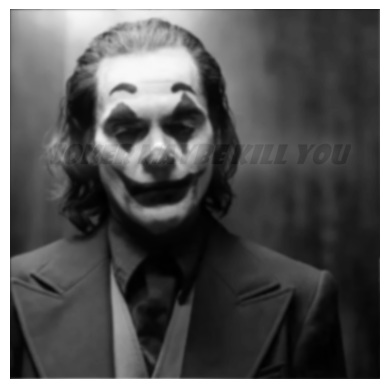

In [7]:
plt.imshow(img ,cmap='gray')  
plt.axis('off')
plt.show()